# Explore here

In [58]:
import pandas as pd

total_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv")
total_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [59]:
total_data = total_data.drop_duplicates().reset_index(drop = True)
total_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Factorizaciones

In [60]:
import pandas as pd
import json

# 1. Cargar el dataset original
clean_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv")

# 2. Eliminar duplicados (opcional pero buena práctica)
clean_data = clean_data.drop_duplicates().reset_index(drop=True)

# 3. Factorización de variables categóricas
clean_data["sex_n"] = pd.factorize(clean_data["sex"])[0]
clean_data["smoker_n"] = pd.factorize(clean_data["smoker"])[0]
clean_data["region_n"] = pd.factorize(clean_data["region"])[0]

# 4. Crear diccionarios de transformación
sex_transformation_rules = {
    row["sex"]: row["sex_n"]
    for _, row in clean_data[["sex", "sex_n"]].drop_duplicates().iterrows()
}

smoker_transformation_rules = {
    row["smoker"]: row["smoker_n"]
    for _, row in clean_data[["smoker", "smoker_n"]].drop_duplicates().iterrows()
}

region_transformation_rules = {
    row["region"]: row["region_n"]
    for _, row in clean_data[["region", "region_n"]].drop_duplicates().iterrows()
}

# 5. Guardar los diccionarios en archivos JSON
with open("sex_transformation_rules.json", "w") as f:
    json.dump(sex_transformation_rules, f)

with open("smoker_transformation_rules.json", "w") as f:
    json.dump(smoker_transformation_rules, f)

with open("region_transformation_rules.json", "w") as f:
    json.dump(region_transformation_rules, f)

print("✅ Reglas de transformación guardadas correctamente en archivos JSON.")


✅ Reglas de transformación guardadas correctamente en archivos JSON.


 Diccionario de OUTLIERS

In [61]:
import pandas as pd
import json

# 1. Cargar y limpiar el dataset
clean_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv")
clean_data = clean_data.drop_duplicates().reset_index(drop=True)

# 2. Crear copias para trabajar
clean_data_con_outliers = clean_data.copy()
clean_data_sin_outliers = clean_data.copy()

# 3. Función para reemplazar outliers por límites IQR
def replace_outliers_from_column(column, df):
    column_stats = df[column].describe()
    iqr = column_stats["75%"] - column_stats["25%"]
    upper_limit = column_stats["75%"] + 1.5 * iqr
    lower_limit = column_stats["25%"] - 1.5 * iqr
    if lower_limit < 0:
        lower_limit = 0  # evitar valores negativos si no tiene sentido

    # Reemplazar valores fuera de los límites
    df[column] = df[column].apply(lambda x: min(max(x, lower_limit), upper_limit))
    return df.copy(), [lower_limit, upper_limit]

# 4. Columnas numéricas donde queremos controlar los outliers
columns_to_check = ["age", "bmi", "children", "charges"]

# 5. Diccionario para guardar los límites
outliers_dict = {}

# 6. Aplicar la función a cada columna
for column in columns_to_check:
    clean_data_sin_outliers, limits_list = replace_outliers_from_column(column, clean_data_sin_outliers)
    outliers_dict[column] = limits_list

# 7. Guardar los límites de outliers en un archivo JSON
with open("outliers_limits.json", "w") as f:
    json.dump(outliers_dict, f, indent=2)

print("✅ Outliers reemplazados y límites guardados en 'outliers_limits.json'")


✅ Outliers reemplazados y límites guardados en 'outliers_limits.json'


In [62]:
import pandas as pd
import json

# 1. Cargar el dataset
clean_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv")
clean_data = clean_data.drop_duplicates().reset_index(drop=True)

# 2. Crear copias para datasets con/sin outliers
clean_data_con_outliers = clean_data.copy()
clean_data_sin_outliers = clean_data.copy()

# 3. Función para reemplazo de outliers
def replace_outliers_from_column(column, df):
    column_stats = df[column].describe()
    iqr = column_stats["75%"] - column_stats["25%"]
    upper_limit = column_stats["75%"] + 1.5 * iqr
    lower_limit = max(0, column_stats["25%"] - 1.5 * iqr)

    df[column] = df[column].apply(lambda x: min(max(x, lower_limit), upper_limit))
    return df.copy(), [round(lower_limit, 2), round(upper_limit, 2)]

# 4. Columnas numéricas que pueden tener outliers
columns_to_check = ["age", "bmi", "children", "charges"]

# 5. Diccionario para almacenar los límites de outliers
outliers_dict = {}

for column in columns_to_check:
    clean_data_sin_outliers, limits = replace_outliers_from_column(column, clean_data_sin_outliers)
    outliers_dict[column] = limits

# 6. Guardar el diccionario en archivo JSON
with open("outliers_replacement.json", "w") as f:
    json.dump(outliers_dict, f, indent=2)

# 7. Mostrar el diccionario
print("✅ Diccionario de outliers guardado en 'outliers_replacement.json'")
outliers_dict


✅ Diccionario de outliers guardado en 'outliers_replacement.json'


{'age': [0, np.float64(87.0)],
 'bmi': [np.float64(13.67), np.float64(47.32)],
 'children': [0, np.float64(5.0)],
 'charges': [0, np.float64(34524.78)]}

In [63]:
import pandas as pd
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# 1. Crear carpeta si no existe
os.makedirs("data/processed", exist_ok=True)

# 2. Cargar dataset y preparar datos
clean_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv")
clean_data = clean_data.drop_duplicates().reset_index(drop=True)
clean_data["sex_n"] = pd.factorize(clean_data["sex"])[0]
clean_data["smoker_n"] = pd.factorize(clean_data["smoker"])[0]
clean_data["region_n"] = pd.factorize(clean_data["region"])[0]

# 3. Reemplazo de outliers
def replace_outliers(column, df):
    stats = df[column].describe()
    iqr = stats["75%"] - stats["25%"]
    upper = stats["75%"] + 1.5 * iqr
    lower = max(0, stats["25%"] - 1.5 * iqr)
    df[column] = df[column].apply(lambda x: min(max(x, lower), upper))
    return df

columns_to_fix = ["age", "bmi", "children", "charges"]
data_con_outliers = clean_data.copy()
data_sin_outliers = clean_data.copy()
for col in columns_to_fix:
    data_sin_outliers = replace_outliers(col, data_sin_outliers)

# 4. Variables numéricas
num_variables = ["age", "bmi", "children", "sex_n", "smoker_n", "region_n", "charges"]

# 5. Separar X e y
X_con = data_con_outliers[num_variables]
X_sin = data_sin_outliers[num_variables]
y = data_con_outliers["charges"]

# 6. Split
# 6. Dividir en train y test
X_train_con, X_test_con, y_train, y_test = train_test_split(
    X_con, y, test_size=0.2, random_state=42
)

X_train_sin, X_test_sin = train_test_split(
    X_sin, test_size=0.2, random_state=42
)



In [64]:
X_train_con.to_excel("data/processed/X_train_con_outliers.xlsx", index=False)
X_train_sin.to_excel("data/processed/X_train_sin_outliers.xlsx", index=False)
X_test_con.to_excel("data/processed/X_test_con_outliers.xlsx", index=False)
X_test_sin.to_excel("data/processed/X_test_sin_outliers.xlsx", index=False)


In [65]:
X_train_con.head()


,age,bmi,children,sex_n,smoker_n,region_n,charges
1113,23,24.510,0,1,1,3,2396.09590
967,21,25.745,2,1,1,3,3279.86855
598,52,37.525,2,0,1,2,33471.97189
170,63,41.470,0,1,1,1,13405.39030
275,47,26.600,2,0,1,3,9715.84100


In [66]:
# Min-Max scaler

from sklearn.preprocessing import MinMaxScaler

total_data["sex_n"] = pd.factorize(total_data["sex"])[0]
total_data["smoker_n"] = pd.factorize(total_data["smoker"])[0]
total_data["region_n"] = pd.factorize(total_data["region"])[0]
num_variables = ["age", "bmi", "children", "sex_n", "smoker_n", "region_n", "charges"]

scaler = MinMaxScaler()
scal_features = scaler.fit_transform(total_data[num_variables])
total_data_scal = pd.DataFrame(scal_features, index = total_data.index, columns = num_variables)
total_data_scal.head()

,age,bmi,children,sex_n,smoker_n,region_n,charges
0,0.021739,0.321227,0.0,0.0,0.0,0.000000,0.251611
1,0.000000,0.479150,0.2,1.0,1.0,0.333333,0.009636
2,0.217391,0.458434,0.6,1.0,1.0,0.333333,0.053115
3,0.326087,0.181464,0.0,1.0,1.0,0.666667,0.333010
4,0.304348,0.347592,0.0,1.0,1.0,0.666667,0.043816


In [67]:
%whos


Variable                       Type                Data/Info
------------------------------------------------------------
LinearRegression               ABCMeta             <class 'sklearn.linear_mo<...>._base.LinearRegression'>
MinMaxScaler                   type                <class 'sklearn.preproces<...>sing._data.MinMaxScaler'>
SelectKBest                    ABCMeta             <class 'sklearn.feature_s<...>e_selection.SelectKBest'>
X                              DataFrame                      age       bmi <...>\n[1337 rows x 6 columns]
X_con                          DataFrame                 age     bmi  childr<...>\n[1337 rows x 7 columns]
X_sin                          DataFrame                 age     bmi  childr<...>\n[1337 rows x 7 columns]
X_test                         DataFrame                     age       bmi  <...>n\n[268 rows x 4 columns]
X_test_con                     DataFrame                 age     bmi  childr<...>n\n[268 rows x 7 columns]
X_test_sel            

NORMALIZACIÓN:

In [68]:
import pandas as pd
import os
import pickle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 1. Crear carpetas si no existen
os.makedirs("models/normalizers", exist_ok=True)
os.makedirs("data/processed", exist_ok=True)

# 2. Cargar y preparar el dataset
clean_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv")
clean_data = clean_data.drop_duplicates().reset_index(drop=True)
clean_data["sex_n"] = pd.factorize(clean_data["sex"])[0]
clean_data["smoker_n"] = pd.factorize(clean_data["smoker"])[0]
clean_data["region_n"] = pd.factorize(clean_data["region"])[0]

# 3. Reemplazo de outliers
def replace_outliers(column, df):
    stats = df[column].describe()
    iqr = stats["75%"] - stats["25%"]
    upper = stats["75%"] + 1.5 * iqr
    lower = max(0, stats["25%"] - 1.5 * iqr)
    df[column] = df[column].apply(lambda x: min(max(x, lower), upper))
    return df

columns_to_fix = ["age", "bmi", "children", "charges"]
data_con_outliers = clean_data.copy()
data_sin_outliers = clean_data.copy()
for col in columns_to_fix:
    data_sin_outliers = replace_outliers(col, data_sin_outliers)

# 4. Variables numéricas
num_variables = ["age", "bmi", "children", "sex_n", "smoker_n", "region_n", "charges"]

# 5. Separar X e y
X_con = data_con_outliers[num_variables]
X_sin = data_sin_outliers[num_variables]
y = data_con_outliers["charges"]

# 6. Split
X_train_con, X_test_con, y_train, y_test = train_test_split(X_con, y, test_size=0.2, random_state=42)
X_train_sin, X_test_sin = train_test_split(X_sin, test_size=0.2, random_state=42)

# 7. Normalizadores con StandardScaler y guardado
normalizador_con_outliers = StandardScaler()
normalizador_con_outliers.fit(X_train_con)
with open("models/normalizers/normalizador_con_outliers.pkl", "wb") as file:
    pickle.dump(normalizador_con_outliers, file)

normalizador_sin_outliers = StandardScaler()
normalizador_sin_outliers.fit(X_train_sin)
with open("models/normalizers/normalizador_sin_outliers.pkl", "wb") as file:
    pickle.dump(normalizador_sin_outliers, file)

# 8. Crear datasets normalizados
X_train_con_norm = pd.DataFrame(normalizador_con_outliers.transform(X_train_con), columns=num_variables)
X_test_con_norm = pd.DataFrame(normalizador_con_outliers.transform(X_test_con), columns=num_variables)

X_train_sin_norm = pd.DataFrame(normalizador_sin_outliers.transform(X_train_sin), columns=num_variables)
X_test_sin_norm = pd.DataFrame(normalizador_sin_outliers.transform(X_test_sin), columns=num_variables)

# Guardar datasets normalizados en Excel
X_train_con_norm.to_excel("data/processed/X_train_con_outliers_norm.xlsx", index=False)
X_test_con_norm.to_excel("data/processed/X_test_con_outliers_norm.xlsx", index=False)
X_train_sin_norm.to_excel("data/processed/X_train_sin_outliers_norm.xlsx", index=False)
X_test_sin_norm.to_excel("data/processed/X_test_sin_outliers_norm.xlsx", index=False)

y_train.to_excel("data/processed/y_train.xlsx", index=False)
y_test.to_excel("data/processed/y_test.xlsx", index=False)

print("✅ Normalizadores guardados en 'models/normalizers/' y datasets normalizados exportados en 'data/processed/'")


✅ Normalizadores guardados en 'models/normalizers/' y datasets normalizados exportados en 'data/processed/'


In [69]:
# Feature selection

from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split

X = total_data_scal.drop("charges", axis = 1)
y = total_data_scal["charges"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

selection_model = SelectKBest(f_regression, k = 4)
selection_model.fit(X_train, y_train)

selected_columns = X_train.columns[selection_model.get_support()]
X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns = selected_columns)
X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns = selected_columns)

X_train_sel.head()

,age,bmi,children,smoker_n
0,0.108696,0.230024,0.0,1.0
1,0.065217,0.263250,0.4,1.0
2,0.739130,0.580172,0.4,1.0
3,0.978261,0.686306,0.0,1.0
4,0.630435,0.286252,0.4,1.0


In [70]:
X_test_sel.head()

,age,bmi,children,smoker_n
0,0.673913,0.176352,0.0,1.0
1,0.239130,0.259349,0.8,1.0
2,0.717391,0.549502,0.6,1.0
3,0.282609,0.495830,0.6,0.0
4,0.282609,0.603444,0.4,1.0


In [71]:
X_train_sel["charges"] = y_train.values
X_test_sel["charges"] = y_test.values
X_train_sel.to_csv("../data/processed/clean_train.csv", index = False)
X_test_sel.to_csv("../data/processed/clean_test.csv", index = False)

Modelo de regresion lineal

In [72]:
train_data = pd.read_csv("../data/processed/clean_train.csv")
test_data = pd.read_csv("../data/processed/clean_test.csv")

train_data.head()

,age,bmi,children,smoker_n,charges
0,0.108696,0.230024,0.0,1.0,0.020339
1,0.065217,0.263250,0.4,1.0,0.034446
2,0.739130,0.580172,0.4,1.0,0.516374
3,0.978261,0.686306,0.0,1.0,0.196070
4,0.630435,0.286252,0.4,1.0,0.137177


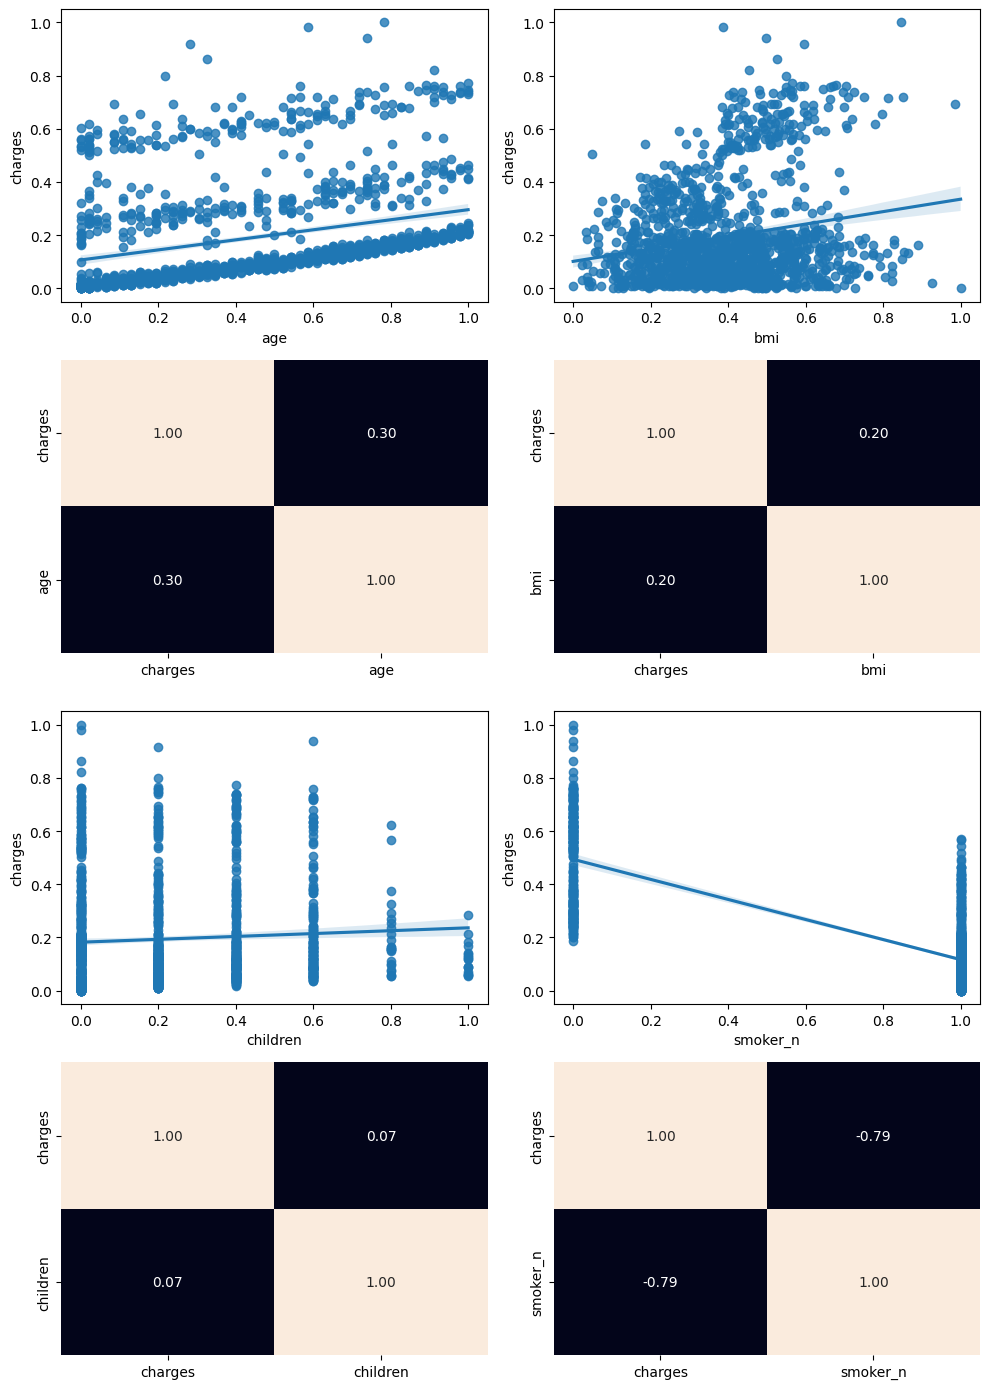

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axis = plt.subplots(4, 2, figsize = (10, 14))
total_data = pd.concat([train_data, test_data])

sns.regplot(data = total_data, x = "age", y = "charges", ax = axis[0, 0])
sns.heatmap(total_data[["charges", "age"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)

sns.regplot(data = total_data, x = "bmi", y = "charges", ax = axis[0, 1])
sns.heatmap(total_data[["charges", "bmi"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1], cbar = False)

sns.regplot(data = total_data, x = "children", y = "charges", ax = axis[2, 0])
sns.heatmap(total_data[["charges", "children"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 0], cbar = False)

sns.regplot(data = total_data, x = "smoker_n", y = "charges", ax = axis[2, 1])
sns.heatmap(total_data[["charges", "smoker_n"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 1], cbar = False)

plt.tight_layout()
plt.show()

In [74]:
X_train = train_data.drop(["charges"], axis = 1)
y_train = train_data["charges"]
X_test = test_data.drop(["charges"], axis = 1)
y_test = test_data["charges"]

In [75]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [76]:
print(f"Intercep (a): {model.intercept_}")
print(f"Coefficients (b1, b2): {model.coef_}")

Intercep (a): 0.3195827183308947
Coefficients (b1, b2): [ 0.1829699   0.18111814  0.04293572 -0.36780589]


In [77]:
y_pred = model.predict(X_test)
y_pred

array([ 0.10702315,  0.07685187,  0.2083241 ,  0.48685684,  0.12995459,
        0.19726353,  0.45755859,  0.00832554,  0.1556988 ,  0.16287349,
        0.14781084,  0.51037008,  0.4699569 ,  0.25944432,  0.14442757,
        0.13842465,  0.05134994,  0.49351746,  0.03848664,  0.0705325 ,
        0.04276279,  0.45855586,  0.22245537,  0.47182868,  0.47460549,
        0.06698449,  0.55116209,  0.5686984 ,  0.15588314,  0.20127518,
        0.0770878 ,  0.19051001, -0.00377298,  0.17967676,  0.61602286,
        0.18050297,  0.06028104,  0.0447116 ,  0.48287007,  0.13064786,
        0.08387671,  0.45610213,  0.54228697,  0.17124485,  0.09976616,
        0.03950023,  0.07028081,  0.12772953,  0.04874519,  0.13229562,
        0.09175793,  0.1653832 ,  0.47297483,  0.04437078,  0.16108797,
        0.14414371,  0.14902535,  0.02014774,  0.48426463,  0.13172362,
        0.2337337 ,  0.11691   ,  0.18103216,  0.00130779,  0.25281818,
        0.14612565,  0.14268127,  0.47671561,  0.38076578,  0.23

In [78]:
from sklearn.metrics import mean_squared_error, r2_score

print(f"MSE: {mean_squared_error(y_test, y_pred)}")
print(f"R2 Score: {r2_score(y_test, y_pred)}")

MSE: 0.009150574110331999
R2 Score: 0.8045531086669288
